# DTSA 5510: Unsupervised Algorithms of Airbnbs in New York
## Unsupervised Algorithms in Machine Learning

## Topic

Living in New York has infamously been associated with a high cost of living. According to Investopedia, Manhattan, New York ranks as the #1 most expensive city within the United States. [1] The site states that groceries to transportation to housing can rack up a cost and in the five boroughs of New York is almost double the average cost of a home compared to the national average ($\$$776, 946 to $\$$355, 852). [1] Thus, with those that have their eyes set on going to the “Empire State”, living outside of the city and going to an Airbnb on the weekends would be a more financially friendly option. 
The goal of this report is to use PCA, clustering, and linear regression to evaluate scrapped AirBnB data produced from Kaggle [2]. The PCA will see how much the model can account for variance, the clustering step will see if there are multiple subsections of the data the evaluator needs to be aware of, and the linear regression model will be used taking features and outputting correlations to a desired predictor. This report wil also compare the two unsupervised models to the supervised one.

## Data 

#### Summary

The following paper analyzes a publically available dataset from Kaggle that is a collection of Airbnb statistics during the year of 2019. [2] The file is labeled, "AB_NYC_2019.csv" and the title of this work on the website is "New York City Airbnb Open Data". [2] More information such as the size and data types are explained further below.

## Install Packages

In [2]:
!pip install folium

#### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import time

#### Read Files from CSV

In [4]:
df_csv = pd.read_csv('./AB_NYC_2019.csv')

#### Space and Size

The space and size for the data frame before preprocesesing is shown below. Output is the memory, column size, and row size.

In [5]:
# Function for Checking Memory and Size
def MemCheck(df):
    # Get Data Frame Space
    df_mem = df.memory_usage().sum()
    print("Memory:", df_mem, "bytes")

    # Get Row and Column Count
    num_row, num_col = df.shape
    print("Rows:", num_row)
    print("Columns:", num_col)
    
MemCheck(df_csv)

Memory: 6258688 bytes
Rows: 48895
Columns: 16


#### Evaluate the data types and column names. 

Below shows the column names and data types associated with each.

In [6]:
# Save to Separate Data Frame
df = df_csv

for col in df.columns:
    print("'" + col + "': " + str(type(df[col].dtype)))

'id': <class 'numpy.dtype[int64]'>
'name': <class 'numpy.dtype[object_]'>
'host_id': <class 'numpy.dtype[int64]'>
'host_name': <class 'numpy.dtype[object_]'>
'neighbourhood_group': <class 'numpy.dtype[object_]'>
'neighbourhood': <class 'numpy.dtype[object_]'>
'latitude': <class 'numpy.dtype[float64]'>
'longitude': <class 'numpy.dtype[float64]'>
'room_type': <class 'numpy.dtype[object_]'>
'price': <class 'numpy.dtype[int64]'>
'minimum_nights': <class 'numpy.dtype[int64]'>
'number_of_reviews': <class 'numpy.dtype[int64]'>
'last_review': <class 'numpy.dtype[object_]'>
'reviews_per_month': <class 'numpy.dtype[float64]'>
'calculated_host_listings_count': <class 'numpy.dtype[int64]'>
'availability_365': <class 'numpy.dtype[int64]'>


In [7]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Preprocessing

#### Removal of Features
For this analysis, all features other than 'name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365' will be removed. Other columns do not add any used information to the data frame and will be potentially inconvenient during analysis.

In [8]:
# State Columns to Keep
col = ['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', \
       'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

# Define Features
num_feat = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
cat_feat = ['neighbourhood', 'room_type']

# Save into New Data Frame
df_rem = df[col]

In [9]:
 # Review
df_rem.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


#### Removing Null Values

The code is shown below removes columns with NA values. Since the amount of rows and thus data which is entered is high, this can be done since the NA rows are assumed to be negligable with such as large data set.|

In [10]:
df_na = df_rem.dropna()

#### Remove Duplicates

If an AirBnB has been entered multiple times, then it will be removed from the data frame with the following code. This is similar to the null values in that there is a large amount of data that can be used for processing and elmiinating the duplicates won't strongly affect the outcome.

In [11]:
df_unique = df_na.drop_duplicates()

#### Space and Size

The space and size for the data frame before and after preprocesesing is shown below.

In [12]:
MemCheck(df)
print()
MemCheck(df_unique)

Memory: 6258688 bytes
Rows: 48895
Columns: 16

Memory: 4692384 bytes
Rows: 48879
Columns: 11


After modifications, the size goes from 6258688 bytes to 4302760 bytes and is reduced to 69% of its original size.

## Exploratory Data Analysis (EDA)

#### Purpose

The following gives an insight into the data and potential models that should be built.

#### Histograms and Box Plots

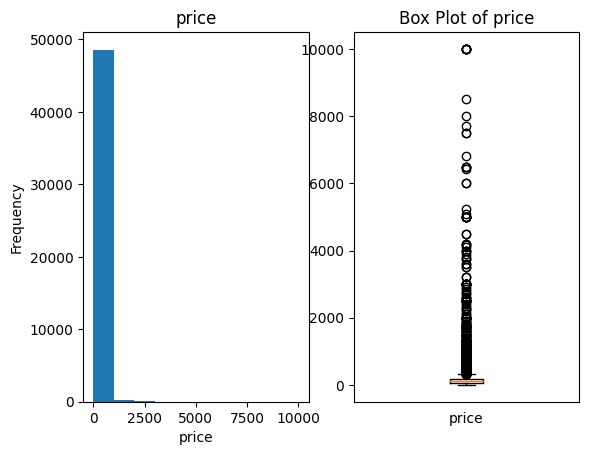

Histogram values:
[48581   188    57    18     9     8     7     3     2     6]

Histogram bin edges:
[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000.]

Box values: 
min        0.0
25%       69.0
50%      106.0
75%      175.0
max    10000.0
Name: price, dtype: float64


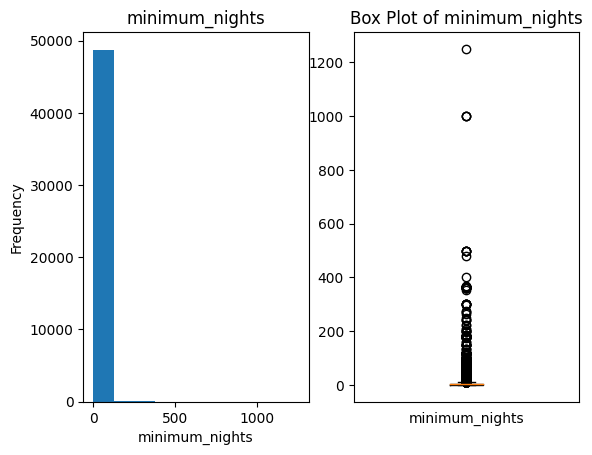

Histogram values:
[48743    76    49     7     0     0     0     3     0     1]

Histogram bin edges:
[1.0000e+00 1.2590e+02 2.5080e+02 3.7570e+02 5.0060e+02 6.2550e+02
 7.5040e+02 8.7530e+02 1.0002e+03 1.1251e+03 1.2500e+03]

Box values: 
min       1.0
25%       1.0
50%       3.0
75%       5.0
max    1250.0
Name: minimum_nights, dtype: float64


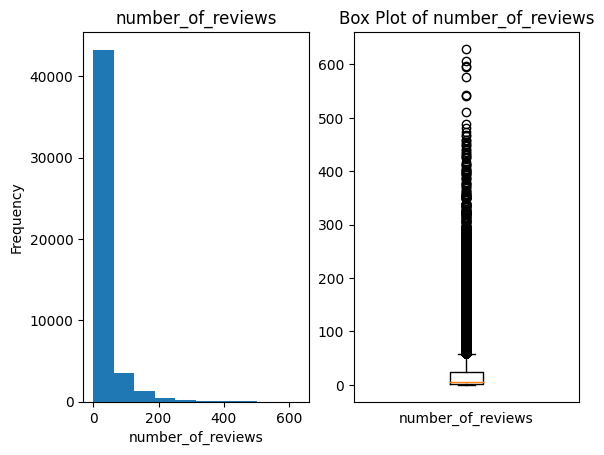

Histogram values:
[43282  3571  1266   499   143    67    31    12     3     5]

Histogram bin edges:
[  0.   62.9 125.8 188.7 251.6 314.5 377.4 440.3 503.2 566.1 629. ]

Box values: 
min      0.0
25%      1.0
50%      5.0
75%     24.0
max    629.0
Name: number_of_reviews, dtype: float64


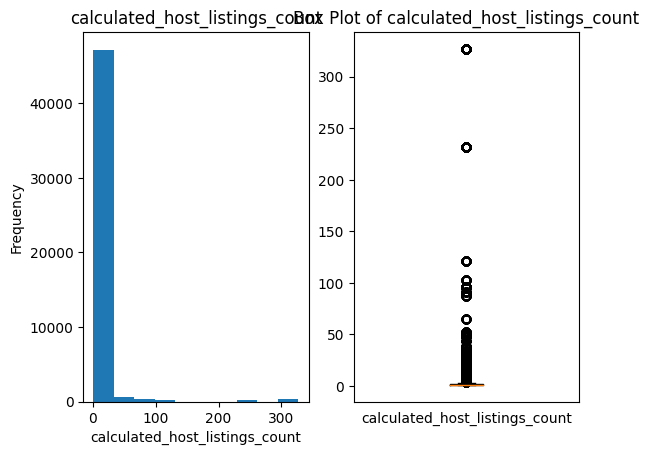

Histogram values:
[47175   551   370   224     0     0     0   232     0   327]

Histogram bin edges:
[  1.   33.6  66.2  98.8 131.4 164.  196.6 229.2 261.8 294.4 327. ]

Box values: 
min      1.0
25%      1.0
50%      1.0
75%      2.0
max    327.0
Name: calculated_host_listings_count, dtype: float64


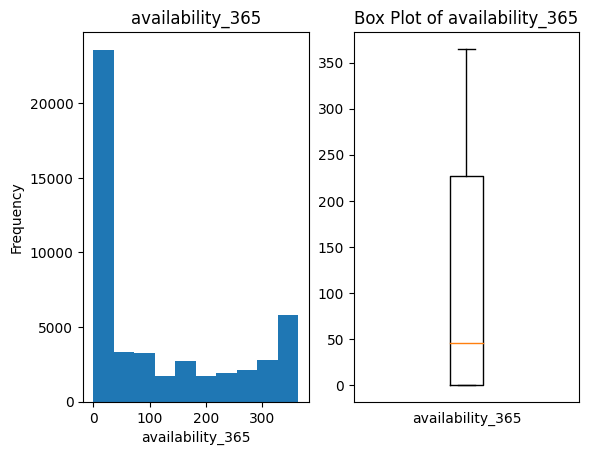

Histogram values:
[23584  3304  3245  1707  2733  1684  1920  2090  2787  5825]

Histogram bin edges:
[  0.   36.5  73.  109.5 146.  182.5 219.  255.5 292.  328.5 365. ]

Box values: 
min      0.0
25%      0.0
50%     45.0
75%    227.0
max    365.0
Name: availability_365, dtype: float64


In [13]:
def histBox(df, col):
    # Generate Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)

    # Add to Subplot
    plt.subplot(1, 2, 2)

    # Generate Box Plot
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')

    # Remove Box Plot Axis Label
    plt.xticks([])

    # Show Figure
    plt.show()

    # Get the histogram values
    hist_val, hist_edg = np.histogram(df[col])
    print('Histogram values:')
    print(hist_val)
    print()
    print('Histogram bin edges:')
    print(hist_edg)
    print()

    # Print Values
    box_val = df.describe().loc[['min', '25%', '50%', '75%', 'max']]
    print('Box values: ')
    print(box_val[col])

histBox(df_unique, 'price')
histBox(df_unique, 'minimum_nights')
histBox(df_unique, 'number_of_reviews')
histBox(df_unique, 'calculated_host_listings_count')
histBox(df_unique, 'availability_365')

#### GIS Visualization

To further analyze the neighborhoods, a map was created to show the locations of the AirBnBs. Since there are 48895 rows and subsequent AirBnBs, random values were chosen from the 

In [14]:
# Group By Neighborhood
group = df_unique.groupby('neighbourhood_group')
df_samp = group.apply(lambda x: x.sample(15))

Now a map with these random values can be used to demonstrate the locations of the AirBnBs within New York.

In [15]:
# Create a Folium Map
map = folium.Map(location=[40.713, -74.006], zoom_start=10)

# Add Markers
for _, row in df_samp.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(map)

# Display
map

#### Difficulties 

Since there were a large amount of outlier in the 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365' columns, these need to be removed. The check that the non-unique rows were kept, the 'name' column needed to be added. When generating the map originally, this made the Jupyter notebook freeze. This was resolved by choosing random values from each neighborhood.

#### Summary, Discussion, and Findings

The price, the minimum number of nights, the number of reviews, and the calculated host listings were surpisingly similar in their lack of variance. There are a significant amount of outliers that will be dealt with before handlign the model. When it came to the availability throughout the year, there was a large spread around the median of 45 days on overage. 

#### Conclusions 

This points to most AirBnB owners being uniform in amount of people reviewing them, the list hosting, and the minimum of nights that are set for these properties. When it comes to long-term stays, there is a larger range potentially due to the property's specific idiosyncracies.

## Results and Analysis

#### Approach

The data will be pruned and adjusted based on the EDA results. This means removing the outliers from the remaining columns. For the modeling, first, the PCA was reveiwed to see how much was attributed to variance. Next, clustering was done to see if there were any subgroups within the data set. Finally, a linear model was created to see if there was a correlation between what the model predicted the price to be and the actual price.

#### EDA Pruning

Because the EDA showed a significant amount of outliers and the need for the removal of the availability column, the data will be pre-processed again before creating the models according to information from the histograms.

In [132]:
df_unique = df_unique[df_unique['price'] <= 200]
df_unique = df_unique[df_unique['minimum_nights'] <= 13]
df_unique = df_unique[df_unique['number_of_reviews'] <= 6]
df_unique = df_unique[df_unique['calculated_host_listings_count'] <= 4]
df_unique = df_unique[df_unique['availability_365'] <= 36.5]

#### Histograms and Box Plots

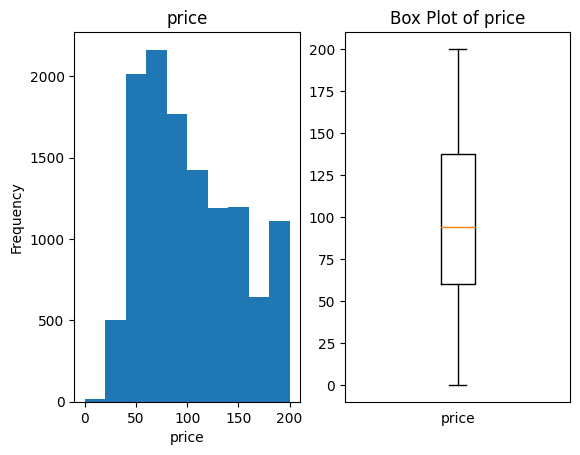

Histogram values:
[  14  504 2016 2164 1770 1426 1191 1199  642 1114]

Histogram bin edges:
[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]

Box values: 
min      0.00
25%     60.00
50%     94.00
75%    137.25
max    200.00
Name: price, dtype: float64


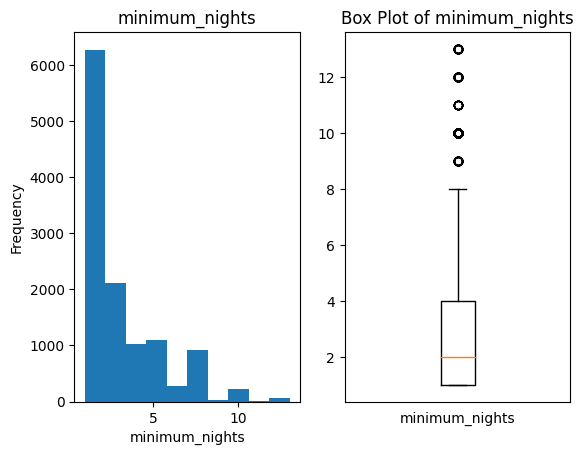

Histogram values:
[6274 2106 1025 1099  282  920   31  223   10   70]

Histogram bin edges:
[ 1.   2.2  3.4  4.6  5.8  7.   8.2  9.4 10.6 11.8 13. ]

Box values: 
min     1.0
25%     1.0
50%     2.0
75%     4.0
max    13.0
Name: minimum_nights, dtype: float64


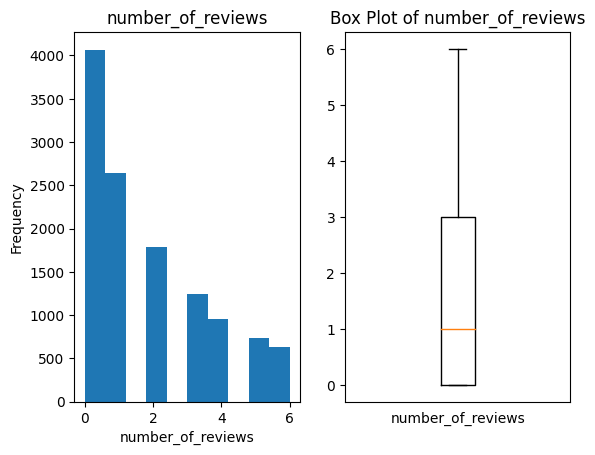

Histogram values:
[4068 2636    0 1781    0 1247  950    0  731  627]

Histogram bin edges:
[0.  0.6 1.2 1.8 2.4 3.  3.6 4.2 4.8 5.4 6. ]

Box values: 
min    0.0
25%    0.0
50%    1.0
75%    3.0
max    6.0
Name: number_of_reviews, dtype: float64


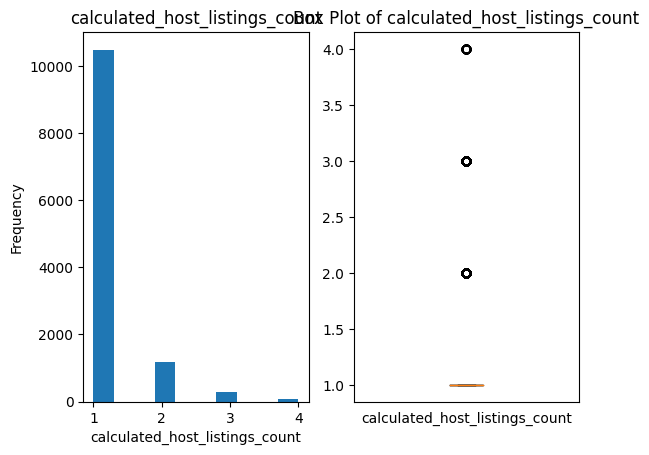

Histogram values:
[10492     0     0  1183     0     0   296     0     0    69]

Histogram bin edges:
[1.  1.3 1.6 1.9 2.2 2.5 2.8 3.1 3.4 3.7 4. ]

Box values: 
min    1.0
25%    1.0
50%    1.0
75%    1.0
max    4.0
Name: calculated_host_listings_count, dtype: float64


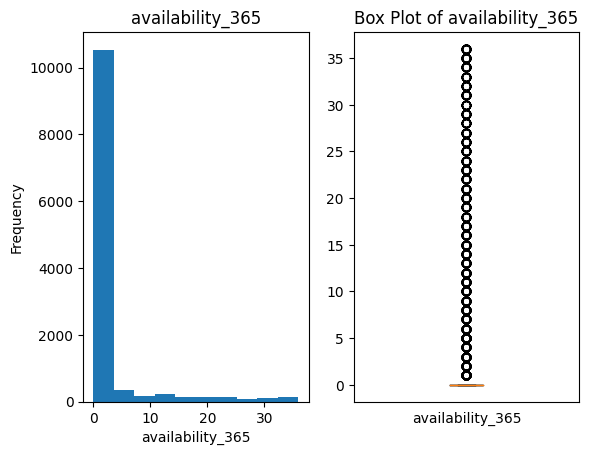

Histogram values:
[10541   347   181   221   141   137   141    79   108   144]

Histogram bin edges:
[ 0.   3.6  7.2 10.8 14.4 18.  21.6 25.2 28.8 32.4 36. ]

Box values: 
min     0.0
25%     0.0
50%     0.0
75%     0.0
max    36.0
Name: availability_365, dtype: float64


In [133]:
histBox(df_unique, 'price')
histBox(df_unique, 'minimum_nights')
histBox(df_unique, 'number_of_reviews')
histBox(df_unique, 'calculated_host_listings_count')
histBox(df_unique, 'availability_365')

#### Drop Columns

After this the 'availability_365' and 'calculated_host_listings_count' were removed. After the filtering, both columns showed themselves to be constants with outliers.

In [134]:
# Drop specific columns
df_mod = df.drop(['availability_365', 'calculated_host_listings_count'], axis=1)
df_mod.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10


#### Unsupervised Model: PCA

First, a PCA was run to determine how many components account for the variance in this model. A one-hot encoder is used to transform the categorical features for concatenation. Next, a standard scalar processed the features which was then utilized in PCA with a set amount of compontents. The variance ratio was output with different components input into the function.

#### Results

Explained Variance Ratio: [0.01006697 0.00505161 0.00496164 0.00451846 0.00447849]


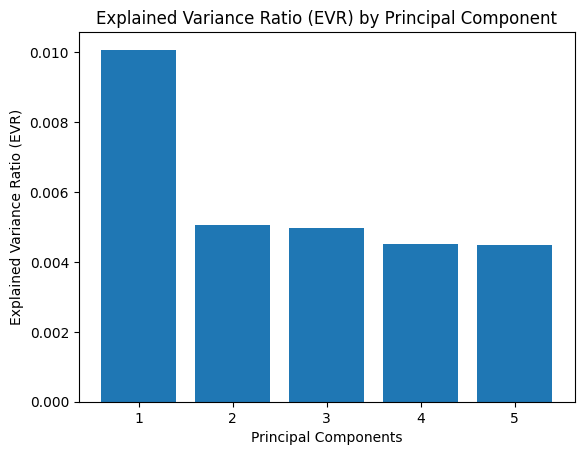

In [135]:
# Function for PCA
def RunPCA(df, cat_feat, num_feat, n_comp):
    # One-hot Encoding
    enc1 = OneHotEncoder()
    enc_feat = enc1.fit_transform(df[cat_feat])

    # Combine encoded categorical features and numerical features
    proc_feat = np.concatenate((enc_feat.toarray(), df[num_feat]), axis=1)

    # Scaler for Process Features
    sca1 = StandardScaler()
    scal_feat = sca1.fit_transform(proc_feat)

    # Get PCA
    pca = PCA(n_components = n_comp)
    pri_comp = pca.fit_transform(scaled_features)

    # Data Frame for Principal Components
    df_prin = pd.DataFrame(data=pri_comp, columns=[c1 for c1 in range(1, n_comp+1)])
    
    # Check Ratio
    EVR = pca.explained_variance_ratio_
    print("Explained Variance Ratio:", EVR)

    # Plot
    plt.bar([c1 for c1 in range(1, n_comp+1)], EVR)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio (EVR)')
    plt.title('Explained Variance Ratio (EVR) by Principal Component')
    plt.show()

    return df_prin

cat_feat = ['neighbourhood', 'room_type']
num_feat = ['price', 'minimum_nights', 'number_of_reviews']

df_prin = RunPCA(df_unique, cat_feat, num_feat, n_comp=5)

#### Time Complexity

The time complexity of significant steps within this function is summarized as follows:
1. One-hot Encoding: O(CM) where C is categories and M is features.
2. Standard Scalar: O(NM) where N is the number of numerical values. 
4. PCA Model: O((C+N)*M) 
5. Data Frame Creation: O(NC) which is the numerical values times the categories.
6. Variance Ratio: O(P) where P is the principal components returned.

#### Unsupervised Model: K-Means Clustering

The following uses K means clustering to determine the groups used for the data. This algorithm will generate clusters for the data and list the members of the group. A one-hot encoder and standard scalar were used to transform the numerical and categorical data. The number of iterations and the cluster value are used as hyperparameters for tuning.

#### Results

In [136]:
# Function for K-Means Cluster
def kmeans_clust(df, num_feat, cat_feat, k, max_it):
    # Apply Transformations
    prep1 = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_feat),
            ('cat', OneHotEncoder(), cat_feat)
        ])

    # Preprocess
    X = df[num_feat + cat_feat]
    X_proc = prep1.fit_transform(X)

    # Apply K-means Clustering
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=max_it, random_state=42)
    kmeans.fit(X_proc)
    clustering_time = time.time() - start_time

    # Add Labels
    df['Cluster'] = kmeans.labels_

    # Get Cluster Count
    cluster_counts = df['Cluster'].value_counts()
    print("Clusters:")
    print(cluster_counts)

    # Print timing information
    print("Per Cluster Time:", clustering_time, "seconds")

# Adjust Cluster Size Holding Iterations Constant
for kval in range(1, 5):
    kmeans_clust(df_unique, num_feat, cat_feat, \
                            kval, 100)

# Adjust Iterations Holding Cluster Constant
for max_it in range(10, 100, 50):
    kmeans_clust(df_unique, num_feat, cat_feat, \
                            3, max_it)

Clusters:
0    12040
Name: Cluster, dtype: int64
Per Cluster Time: 0.7911324501037598 seconds
Clusters:
1    6609
0    5431
Name: Cluster, dtype: int64
Per Cluster Time: 3.226331949234009 seconds
Clusters:
2    5361
1    4514
0    2165
Name: Cluster, dtype: int64
Per Cluster Time: 4.618690729141235 seconds
Clusters:
0    4351
1    3363
2    2438
3    1888
Name: Cluster, dtype: int64
Per Cluster Time: 5.22634744644165 seconds
Clusters:
2    5361
1    4521
0    2158
Name: Cluster, dtype: int64
Per Cluster Time: 3.862924098968506 seconds
Clusters:
2    5361
1    4514
0    2165
Name: Cluster, dtype: int64
Per Cluster Time: 4.5334312915802 seconds


#### K Means Clustering

The time complexity of significant steps within this function is summarized as follows:
1. One-hot Encoding: O(CM) where C is categories and F is features.
2. Standard Scalar: O(NM) where N is the number of numerical values and M is features.
3. Splitting Data: O(L) where L is the length of the input data. 
4. K-Means Clustering: O(NKIM) where K is the cluster number and I is the iteration value. 

#### Supervised Method: Linear Model

A linear model was created where the numerical and categorical features are run through a standard scalar and one-hot encoder to generate appropriate numeric values for processing. The data is split into test and training at a 80:20 split. The data is preprocessed, the timer starts, and a linear regression model is created. Using the rest of the data, the test data is used and the results are plotted.

#### Results

Mean Squared Error: 1113.513077185032
R-squared: 0.4861501876154918
Preprocessing Time: 0.04028463363647461 seconds
Training Time: 0.046866655349731445 seconds
Prediction Time: 0.0 seconds


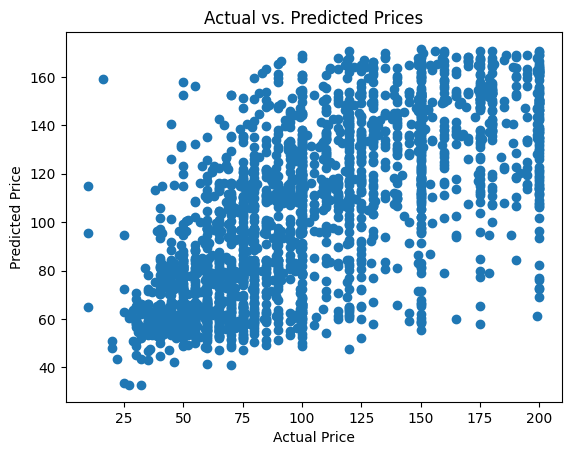

In [137]:
# Function for Linear Regression
def lin_reg(num_feat, cat_feat, X, y):

    # Apply Tranformation
    prep1 = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_feat),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feat)
        ])

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocess Data
    start_time = time.time()
    X_train2 = prep1.fit_transform(X_train)
    X_test2 = prep1.transform(X_test)
    time_prep = time.time() - start_time

    # Create Model
    model = LinearRegression()

    # Fit Model
    start_time = time.time()
    model.fit(X_train2, y_train)
    training_time = time.time() - start_time

    # Predict with Model
    start_time = time.time()
    y_pred = model.predict(X_test2)
    pred_time = time.time() - start_time

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print Out Info
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("Preprocessing Time:", time_prep, "seconds")
    print("Training Time:", training_time, "seconds")
    print("Prediction Time:", pred_time, "seconds")

    # Plot
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs. Predicted Prices')
    plt.show()

# Define Features and Variables
num_feat = ['minimum_nights', 'number_of_reviews']
cat_feat = ['neighbourhood', 'room_type']

X = df_unique[num_feat + cat_feat]
y = df_unique['price']

# Call the function with the specified hyperparameter and data
lin_reg(num_feat, cat_feat, X, y)

#### Time Complexity

The time complexity of significant steps within this function is summarized as follows:

1. One-hot Encoding: O(CM) where C is categories and F is features.
2. Standard Scalar: O(NM) where N is the number of numerical values and M is features.
3. Splitting Data: O(L) where L is the length of the input data. 
4. Fitting the Model: O(NM)
5. Predictions: O(NM)
6. MSE: O(V) where V is the generated values.  

#### Optimization Methods

For the models, these can be optimized in several ways:<br>

PCA: Through the cross-validation output, the model can have hyperparameters tuned and adjusted for a better overall model for analysis. <br>
Clustering: Finding the optimal cluster count can eliminate the need for other iterations and save on time. <br>
Linear Regression: This can be further optimized through more preprocessing of the data and feature engineering. <br>

#### Summary

There are take away for each of the models. When it comes to the PCA model, the first component was responsible for the most amount of variance. Using multiple hyperparameters to test for different components showed that this was true. As for the clustering, the ideal amount of clusters is three. Any more has diminishing return in improvements and takes up unneeded time. The hyperparameter being adjusted was the number of iterations and the cluster value. The number of iterations can be decreased to ten as the model with the least amount of iterations strongly resembled the final model. The linear regression model fit was not ideal and had an R squared of approximately 0.5. This means that another type of regression should potentially be applied that takes into account the high variance in price. When it comes to PCA, there should be only one component since this could account for the highest amount of variance. When it comes to evaluation metrics, since the EVR values were low, this means that the data should be reduced further for higher values in dimensionality. For the linear regression model, the mean squared error and R squared value both showed that the fit wasn't the best and that another model should be used. After viewing the plot, one can see this is due to the overlapping data points in the actual price. This could be reduced further. 
In comparison, the clustering was the best method, the linear model the second best, and the PCA the worst. However, the PCA was only at fault due to the data it received and the linear regression model's problems were inherent to the model itself. Thus, with proper input, the PCA might provide more fruitful results. 

#### Pipeline Design

Within a pipeline, the data will first be loaded into a data structure and undergo data preprocessing. Cleaning, handing of NAs, one-hot encoding for categories, and standardization will be used during this step. Next, the dimensionality reduction will be used in the PCA step to determine the number of components to keep depending on variance. This data will be put into a new data frame that will be used for clustering. A k-means clustering algorithm will be used (in this case it was K-means) and clustering labels will be applied post-processing. The clusters will be analyzed for specific features or anomalizes and supervised learning such as linear regression will be used in conjuncture for desired output from selected features.

## Discussion and Conclusion

#### Lessons Learned

First, the linear regression model was expected to do a fair job of predicting the actual price. Before spending time creating this model, the variance should have been evaluated for the column itself. The PCA wasn't able to generate high quality components because of the preprocessing, thus more time should be taken in doing that step.

#### Mistakes

Initially, there was an error with generating the EDA model map. The notebook crashed and it was found out that the map tried plotting all of the points. The input data frame was adjusted and as a note for future users to be careful with the GIS code. Originally, the iterations selected for the K-means cluster was too large and thus small iterations are advised to avoid time sinks.

#### Future Improvement Opportunities

The linear regression model didn't fit well and thus another type, perhaps one with a logarithmic function, should be used instead. For clustering, there wasn't much distribution between the clusters, as in one single cluster held most of the points, and thus subgroups are advised to be looked into for future projects. For the housing, the oneighborhoods should be separated and evaluated.

## APA Citations

[1] Dhir, R. (2023, April 6). Top 10 most expensive cities in the U.S. Investopedia. <br> https://www.investopedia.com/articles/personal-finance/080916/top-10-most-expensive-cities-us.asp <br>
[2] DGOMONOV. (2019, June 23). New York City Airbnb Open Data. Kaggle. <br> https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data